In [375]:
import numpy as np
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

# Definicje funkcji

In [376]:
#metoda eulera
def euler(f, y0, t, params=None):
    y = np.zeros(len(t))
    y[0] = y0
    for i in range(0, len(t)-1):
        y[i+1] = y[i] + f(y[i],t[i], *(params or []))*(t[i+1]-t[i])
    return y

#metoda rutty-kutty'ego 2 rzędu
def rk2(f, y0, t, params=None):
    y = np.zeros(len(t))
    y[0] = y0
    for i in range(len(t) - 1):
        h = t[i+1] - t[i]
        k1 = f(y[i], t[i], *(params or []))
        k2 = f(y[i] + k1*h/2, t[i] + h/2, *(params or []))
        y[i+1] = y[i] + k2 * h
    return y

#metoda rutty-kutty'ego 4 rzędu
def rk4(f, y0, t, params=None):
    if np.isscalar(y0):
        y0 = np.array([y0])
    
    y = np.zeros((len(t), len(y0)))
    y[0] = y0  
    
    if params is None:
        params = ()

    for i in range(len(t) - 1):
        h = t[i + 1] - t[i]  
        
        k1 = f(y[i], t[i],  *params) * h
        k2 = f(y[i] + k1 / 2, t[i] + h / 2,  *params) * h
        k3 = f(y[i] + k2 / 2, t[i] + h / 2, *params) * h
        k4 = f(y[i] + k3, t[i] + h, *params) * h
        
        y[i + 1] = y[i] + (k1 + 2 * k2 + 2 * k3 + k4) / 6
    
    return y

# Zadanie 1

In [377]:
# Równanie różniczkowe
def f1(y, t):
    return t**2 - 4*y

# Rozwiązanie analityczne
def analytical_solution(x):
    return 1/32 * (8*x**2 - 4*x + 31*np.exp(-4*x) + 1)

In [378]:
x_1 = np.linspace(0, 0.03, 2) 
x_2 = np.linspace(0, 0.03, 3) 
x_4 = np.linspace(0, 0.03, 5) 
y0 = 1

In [379]:
y_euler_1 = euler(f1, y0, x_1)
y_rk2_1 = rk2(f1, y0, x_1)
y_rk4_1 = rk4(f1, y0, x_1)
y_analytical_1 = analytical_solution(x_1)

y_euler_2 = euler(f1, y0, x_2)
y_rk2_2 = rk2(f1, y0, x_2)
y_rk4_2 = rk4(f1, y0, x_2)
y_analytical_2 = analytical_solution(x_2)

y_euler_3 = euler(f1, y0, x_4)
y_rk2_3 = rk2(f1, y0, x_4)
y_rk4_3 = rk4(f1, y0, x_4)
y_analytical_3 = analytical_solution(x_4)

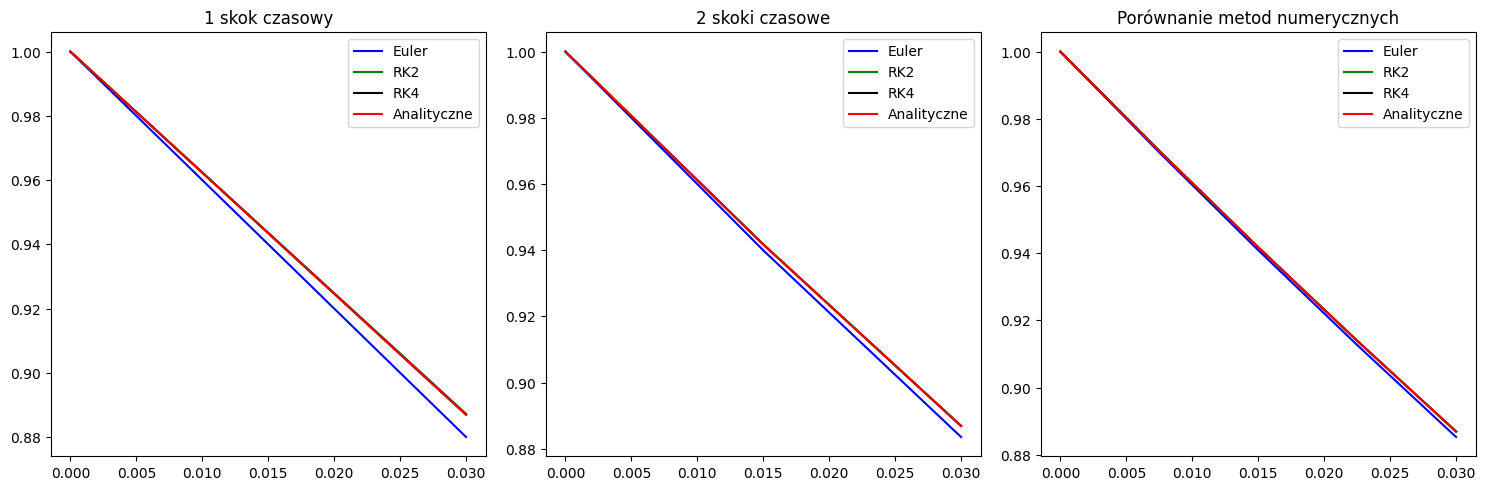

In [380]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].plot(x_1, y_euler_1,'b-', label='Euler')
axes[0].plot(x_1, y_rk2_1,'g-', label='RK2')
axes[0].plot(x_1, y_rk4_1,'k-', label='RK4')
axes[0].plot(x_1, y_analytical_1, 'r-', label='Analityczne')
axes[0].legend()


axes[1].plot(x_2, y_euler_2,'b-', label='Euler')
axes[1].plot(x_2, y_rk2_2,'g-', label='RK2')
axes[1].plot(x_2, y_rk4_2,'k-', label='RK4')
axes[1].plot(x_2, y_analytical_2, 'r-', label='Analityczne')
axes[1].legend()


axes[2].plot(x_4, y_euler_3,'b-', label='Euler')
axes[2].plot(x_4, y_rk2_3,'g-', label='RK2')
axes[2].plot(x_4, y_rk4_3,'k-', label='RK4')
axes[2].plot(x_4, y_analytical_3, 'r-', label='Analityczne')
axes[2].legend()


axes[0].set_title("1 skok czasowy") 
axes[1].set_title("2 skoki czasowe") 
axes[2].set_title("4 skoki czasowe") 

plt.tight_layout()
plt.title("Porównanie metod numerycznych")

plt.show()

Jak widać na wykresach, metody Rutty-Kutty'ego się pokrywają z rozwiązaniem analitycznym od najmniejszej ilości skoków czasowych, zaś metoda Eulera staje się coraz dokładniejsza.

In [381]:
print("Wyniki dla y(0.03) metodą eulera:")
print("1 krok czasowy: {}".format(y_euler_1[-1]))
print("2 kroki czasowe: {}".format(y_euler_2[-1]))
print("4 kroki czasowe: {}".format(y_euler_3[-1]))

Wyniki dla y(0.03) metodą eulera:
1 krok czasowy: 0.88
2 kroki czasowe: 0.883603375
4 kroki czasowe: 0.8852986406921876


In [382]:
print("Wyniki dla y(0.03) metodą RK2:")
print("1 krok czasowy: {}".format(y_rk2_1[-1]))
print("2 kroki czasowe: {}".format(y_rk2_2[-1]))
print("4 kroki czasowe: {}".format(y_rk2_3[-1]))

Wyniki dla y(0.03) metodą RK2:
1 krok czasowy: 0.88720675
2 kroki czasowe: 0.8869955271437501
4 kroki czasowe: 0.8869453945835604


In [383]:
print("Wyniki dla y(0.03) metodą RK4:")
print("1 krok czasowy: {}".format(y_rk4_1[-1][0]))
print("2 kroki czasowe: {}".format(y_rk4_2[-1][0]))
print("4 kroki czasowe: {}".format(y_rk4_3[-1][0]))

Wyniki dla y(0.03) metodą RK4:
1 krok czasowy: 0.8869293781
2 kroki czasowe: 0.8869291852678767
4 kroki czasowe: 0.8869291738135916


In [384]:
print("Rozwiązanie analityczner: y(0.03) = {}".format(y_analytical_1[-1]))


Rozwiązanie analityczner: y(0.03) = 0.8869291730697463


# Zadanie 2

Definiujemy funkcję i używamy metod by porównać otrzymane rozwiązania.

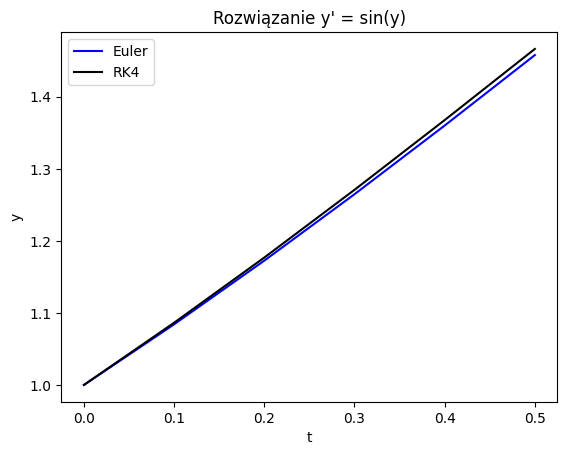

In [385]:
def f(y,t):
    return np.sin(y)

h = 0.1
t = np.arange(0, 0.5 + h, h)
y0 = 1

y_euler_solution = euler(f, y0, t)
y_rk4_solution = rk4(f, y0, t)

plt.plot(t, y_euler_solution, color="blue", label='Euler')
plt.plot(t, y_rk4_solution, color="black", label='RK4')
plt.xlabel('t')
plt.ylabel('y')
plt.title("Rozwiązanie y' = sin(y)")
plt.legend()
plt.show()


Jak widać otrzymane rozwiązania są podobne dla obydwu metod, jedynie dla większych t się rozjeżdżają.

# Zadanie 3

Na początek zdefiniujmy funkcję oraz wszystkie potrzebne parametry.

In [386]:
def wahadlo(y, t, Q, A_hat, omega_hat):
    theta, v = y 
    dtheta_dt = v
    dv_dt = -1/Q * v - np.sin(theta) + A_hat * np.cos(omega_hat * t)
    return np.array([dtheta_dt, dv_dt])

In [387]:
Q = 2
omega_hat = 2/3
t = np.linspace(0, 50, 1000)  

A_hats = np.array([0.5, 1.35])
thetas = np.array([0.01, 0.3])
v0 = 0

Teraz rozwiążmy każdy przypadek za pomocą metody RK4 i przedstawmy rozwiązanie na wykresie

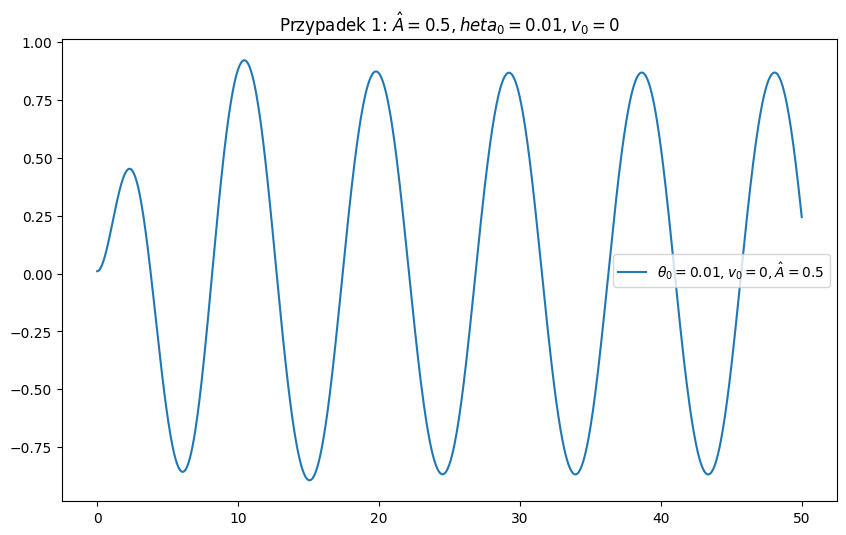

In [388]:
result = rk4(wahadlo, [thetas[0], v0], t, (Q, A_hats[0], omega_hat))
theta, v = result[:, 0], result[:, 1]

plt.figure(figsize=(10, 6))
plt.plot(t, theta, label=fr"$\theta_0={thetas[0]}, v_0={v0}, \hat{{A}}={A_hats[0]}$")
plt.title(f"Przypadek 1: $\hat{{A}}={A_hats[0]}, \theta_0={thetas[0]}, v_0={v0}$")
plt.legend()
plt.show()

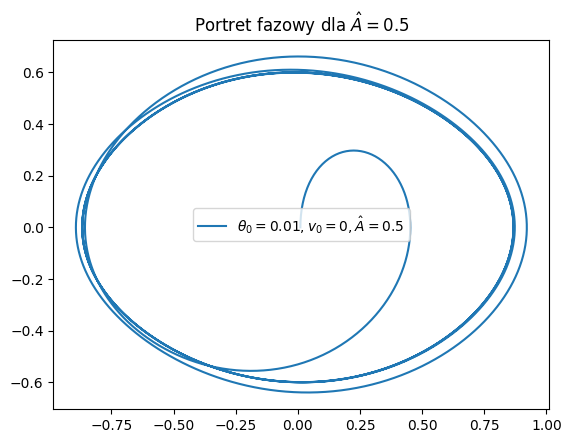

In [389]:
    # Wykres trajektorii w przestrzeni fazowej
plt.plot(theta, v, label=fr"$\theta_0={thetas[0]}, v_0={v0}, \hat{{A}}={A_hats[0]}$")
plt.title(rf"Portret fazowy dla $\hat{{A}}={A_hats[0]}$")
plt.legend()

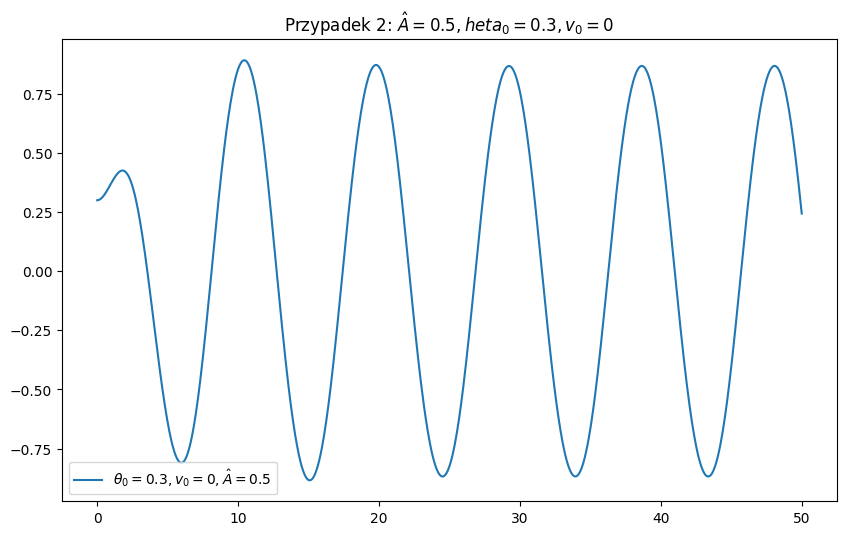

In [390]:
result = rk4(wahadlo, [thetas[1], v0], t, (Q, A_hats[0], omega_hat))
theta, v = result[:, 0], result[:, 1]

plt.figure(figsize=(10, 6))
plt.plot(t, theta, label=fr"$\theta_0={thetas[1]}, v_0={v0}, \hat{{A}}={A_hats[0]}$")
plt.title(f"Przypadek 2: $\hat{{A}}={A_hats[0]}, \theta_0={thetas[1]}, v_0={v0}$")
plt.legend()
plt.show()

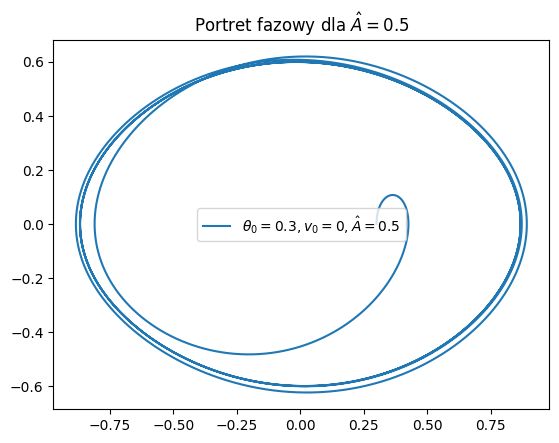

In [391]:
plt.plot(theta, v, label=fr"$\theta_0={thetas[1]}, v_0={v0}, \hat{{A}}={A_hats[0]}$")
plt.title(rf"Portret fazowy dla $\hat{{A}}={A_hats[0]}$")
plt.legend()

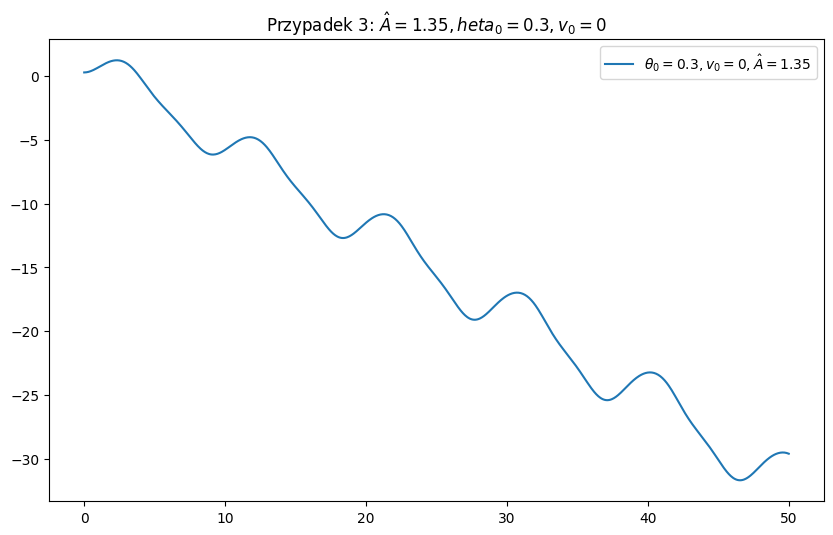

In [392]:
result = rk4(wahadlo, [thetas[1], v0], t, (Q, A_hats[1], omega_hat))
theta, v = result[:, 0], result[:, 1]

plt.figure(figsize=(10, 6))
plt.plot(t, theta, label=fr"$\theta_0={thetas[1]}, v_0={v0}, \hat{{A}}={A_hats[1]}$")
plt.title(f"Przypadek 3: $\hat{{A}}={A_hats[1]}, \theta_0={thetas[1]}, v_0={v0}$")
plt.legend()
plt.show()

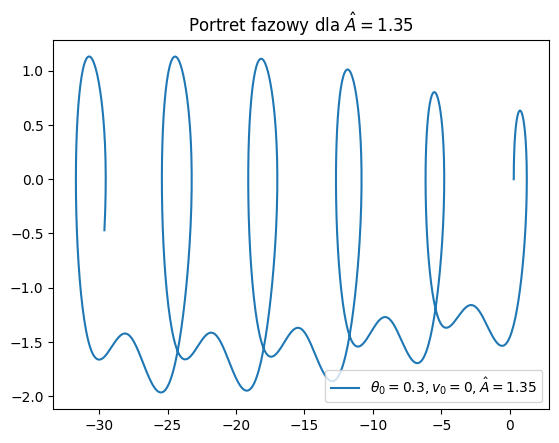

In [393]:
plt.plot(theta, v, label=fr"$\theta_0={thetas[1]}, v_0={v0}, \hat{{A}}={A_hats[1]}$")
plt.title(rf"Portret fazowy dla $\hat{{A}}={A_hats[1]}$")
plt.legend()

# Zadanie 4

Zdefiniujmt stałe oraz funkcje reprezentujące lot piłki z oporem powietrze oraz bez oporu

In [394]:
g = 9.81 
cw = 0.35 
rho = 1.2 
def with_resist(y, t, cw, rho, A, m, g):
    vx, vy, x, y_pos = y  
    v = np.sqrt(vx**2 + vy**2)
    ax = -0.5 * cw * rho * A * v * vx / m  
    ay = -g - 0.5 * cw * rho * A * v * vy / m  
    return np.array([ax, ay, vx, vy])  

def no_resist(v0, alpha, g, t):
    x = v0 * np.cos(alpha) * t
    y = v0 * np.sin(alpha) * t - 0.5 * g * t**2
    return x, y

A = np.array([0.045,0.038,0.11])
m = np.array([0.43,0.145,1])

v0_values = [15, 20, 25] 
angles = [30, 45, 60] 

t = np.linspace(0, 5, 1000)



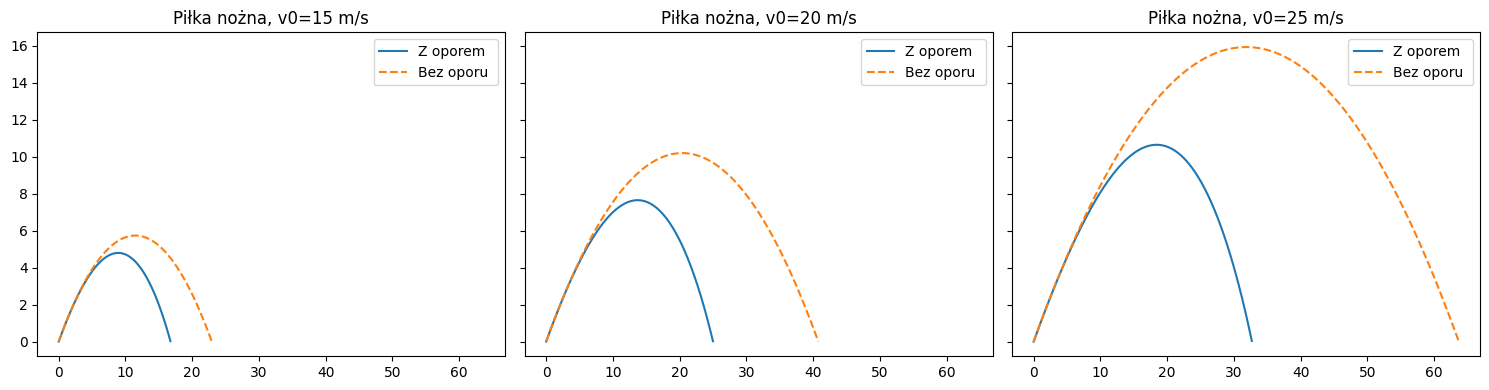

In [395]:
fig, axs = plt.subplots(1, len(v0_values), figsize=(15, 4), sharex=True, sharey=True)


for j, v0 in enumerate(v0_values):
        alpha = np.radians(45) 


        x_no_resist, y_no_resist = no_resist(v0, alpha, g, t)


        y0_resist = [v0 * np.cos(alpha), v0 * np.sin(alpha), 0, 0]
        params = (cw, rho, A[0], m[0], g)
        result_resist = rk4(with_resist, y0_resist, t, params)
        x_resist, y_resist = result_resist[:, 2], result_resist[:, 3]


        y_no_resist[y_no_resist < 0] = np.nan
        y_resist[y_resist < 0] = np.nan


        axs[j].plot(x_resist, y_resist, label="Z oporem ", linestyle="-")
        axs[j].plot(x_no_resist, y_no_resist, label="Bez oporu ", linestyle="--")
        axs[j].set_title(f"Piłka nożna, v0={v0} m/s")
        axs[j].legend()
plt.tight_layout()

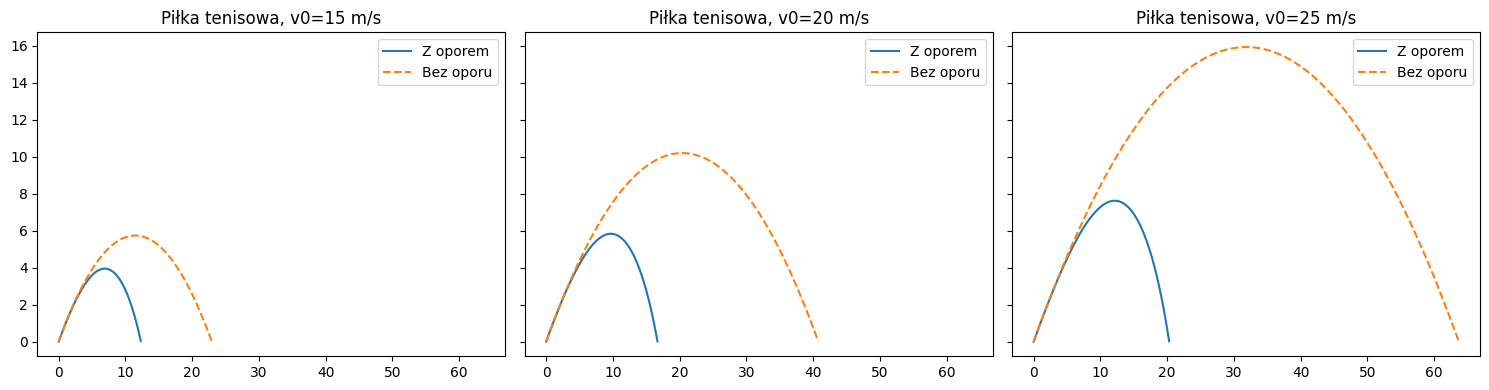

In [396]:
fig, axs = plt.subplots(1, len(v0_values), figsize=(15, 4), sharex=True, sharey=True)

for j, v0 in enumerate(v0_values):
        alpha = np.radians(45) 


        x_no_resist, y_no_resist = no_resist(v0, alpha, g, t)


        y0_resist = [v0 * np.cos(alpha), v0 * np.sin(alpha), 0, 0]
        params = (cw, rho, A[1], m[1], g)
        result_resist = rk4(with_resist, y0_resist, t, params)
        x_resist, y_resist = result_resist[:, 2], result_resist[:, 3]


        y_no_resist[y_no_resist < 0] = np.nan
        y_resist[y_resist < 0] = np.nan


        axs[j].plot(x_resist, y_resist, label="Z oporem", linestyle="-")
        axs[j].plot(x_no_resist, y_no_resist, label="Bez oporu", linestyle="--")
        axs[j].set_title(f"Piłka tenisowa, v0={v0} m/s")
        axs[j].legend()
plt.tight_layout()

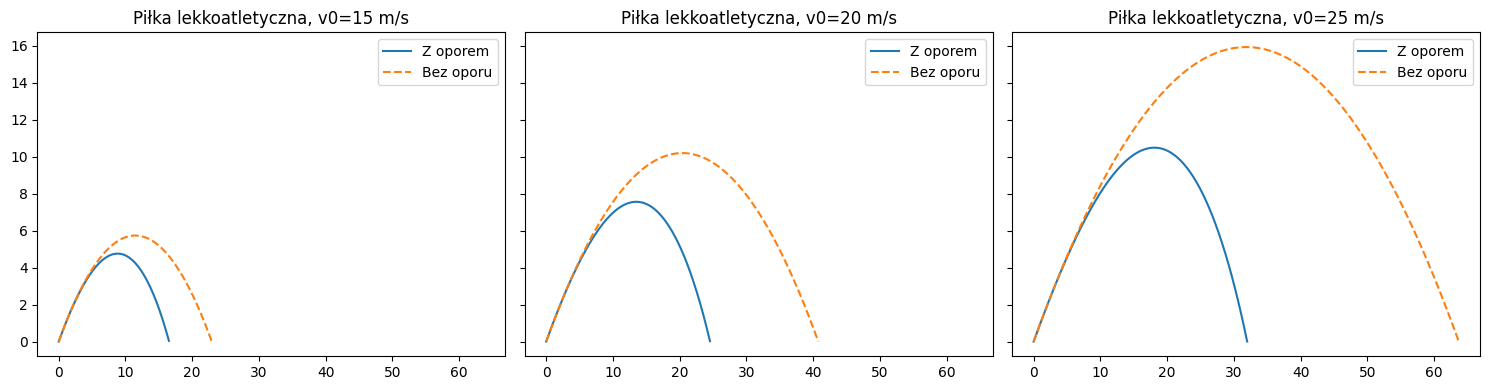

In [397]:
fig, axs = plt.subplots(1, len(v0_values), figsize=(15, 4), sharex=True, sharey=True)


for j, v0 in enumerate(v0_values):
        alpha = np.radians(45) 


        x_no_resist, y_no_resist = no_resist(v0, alpha, g, t)


        y0_resist = [v0 * np.cos(alpha), v0 * np.sin(alpha), 0, 0]
        params = (cw, rho, A[2], m[2], g)
        result_resist = rk4(with_resist, y0_resist, t, params)
        x_resist, y_resist = result_resist[:, 2], result_resist[:, 3]


        y_no_resist[y_no_resist < 0] = np.nan
        y_resist[y_resist < 0] = np.nan


        axs[j].plot(x_resist, y_resist, label="Z oporem", linestyle="-")
        axs[j].plot(x_no_resist, y_no_resist, label="Bez oporu", linestyle="--")
        axs[j].set_title(f"Piłka lekkoatletyczna, v0={v0} m/s")
        axs[j].legend()
plt.tight_layout()

# Zadanie 5

Aby rozwiązać to zadanie skorzystamy z metody strzałowej, która jest często używanym narzędziem do rozwiązywania zagadnień brzegowych

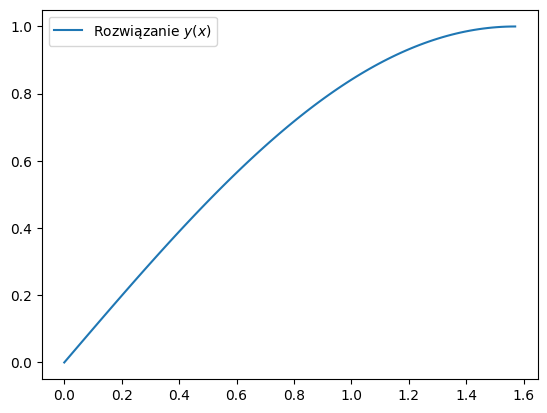

In [399]:
def shooting_method(f, g, x, target, y0_guess, tol=1e-6, max_iter=50):
    a, b = y0_guess  
    for i in range(max_iter):
        u_a = rk4(f, [0, a], x)
        u_b = rk4(f, [0, b], x)
        
        fa = g(u_a[-1, 0], target)
        fb = g(u_b[-1, 0], target)
        
        if fa * fb > 0:
            raise ValueError("Brak zmiany znaku.")
        
        c = (a + b) / 2
        u_c = rk4(f, [0, c], x)
        fc = g(u_c[-1, 0], target)
        
        if abs(fc) < tol:
            return c, u_c
        
        if fa * fc < 0:
            b = c
        else:
            a = c
    
    raise ValueError("Brak zbieżności.")

def f(u, t):
    u1, u2 = u
    return np.array([u2, -u1])

def boundary_condition(y_end, target):
    return y_end - target

x = np.linspace(0, np.pi / 2, 100)
target = 1  
y0_guess = [0, 10]  

y0_opt, solution = shooting_method(f, boundary_condition, x, target, y0_guess)

plt.plot(x, solution[:, 0], label="Rozwiązanie $y(x)$")
plt.legend()
plt.show()